# ***Importing Dependencies***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# ***uploading Data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp -r "/content/drive/MyDrive/ML/fraud detection/" /content

In [ ]:
df_client = pd.read_csv("/content/fraud detection/Train/client_train.csv")
df_invoice = pd.read_csv("/content/fraud detection/Train/invoice_train.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#***Data Exploration***

In [ ]:
df_client.describe(include='all')

,disrict,client_id,client_catg,region,creation_date,target
count,135493.000000,135493,135493.000000,135493.000000,135493,135493.000000
unique,NaN,135493,NaN,NaN,8088,NaN
top,NaN,train_Client_0,NaN,NaN,20/11/1997,NaN
freq,NaN,1,NaN,NaN,214,NaN
mean,63.511222,NaN,11.512506,206.159809,NaN,0.055841
std,3.354400,NaN,4.423761,104.207044,NaN,0.229614
min,60.000000,NaN,11.000000,101.000000,NaN,0.000000
25%,62.000000,NaN,11.000000,103.000000,NaN,0.000000
50%,62.000000,NaN,11.000000,107.000000,NaN,0.000000
75%,69.000000,NaN,11.000000,307.000000,NaN,0.000000


In [ ]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
df_client.duplicated().any()

False

In [ ]:
df_client.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
region_group     0
coop_time        0
dtype: int64

In [ ]:
df_client.nunique()

disrict               4
client_id        135493
client_catg           3
region               25
creation_date      8088
target                2
region_group          2
coop_time           516
dtype: int64

In [ ]:
df_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
df_invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


In [ ]:
df_invoice.nunique()

client_id               135493
invoice_date              8275
tarif_type                  17
counter_number          201893
counter_statue               6
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
counter_type                 2
invoice_month               12
invoice_year                43
is_weekday                   2
delta_index              21082
dtype: int64

In [ ]:
df_invoice.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
invoice_month           0
invoice_year            0
is_weekday              0
delta_index             0
dtype: int64

#***Data Processing : viz & merging & cleaning***

In [ ]:
data = df_client['target'].value_counts().tolist()
labels = ["NON-FRAUD","FRAUD"]

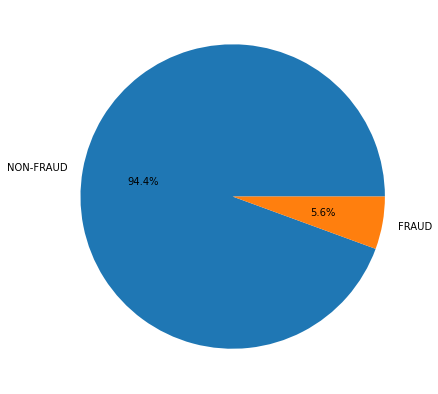

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels,autopct='%1.1f%%')
plt.show()

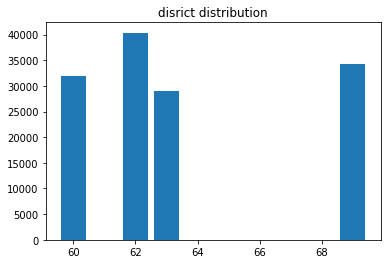

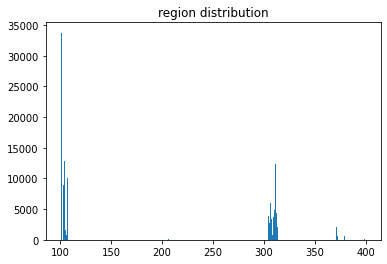

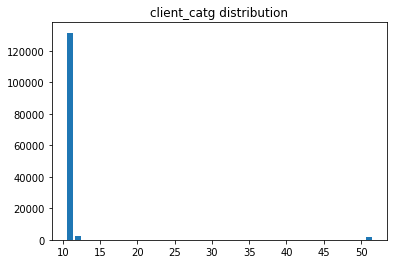

In [ ]:
for col in ['disrict','region','client_catg']:
    ds = df_client.groupby([col])['client_id'].count()
    plt.bar(x=ds.index, height=ds.values)
    plt.title(col+' distribution')
    plt.show()

In [ ]:
def feature_change(cl, inv):

    cl['client_catg'] = cl['client_catg'].astype('category')
    cl['disrict'] = cl['disrict'].astype('category')
    cl['region'] = cl['region'].astype('category')
    cl['region_group'] = cl['region'].apply(lambda x: 100 if x<100 else 300 if x>300 else 200)
    cl['creation_date'] = pd.to_datetime(cl['creation_date'])
    
    cl['coop_time'] = (2019 - cl['creation_date'].dt.year)*12 - cl['creation_date'].dt.month

    inv['counter_type'] = inv['counter_type'].map({"ELEC":1,"GAZ":0})
    inv['counter_statue'] = inv['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,769:5,'0':0,'5':5,'1':1,'4':4,'A':0,618:5,269375:5,46:5,420:5})
    
    inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], dayfirst=True)
    inv['invoice_month'] = inv['invoice_date'].dt.month
    inv['invoice_year'] = inv['invoice_date'].dt.year
    inv['is_weekday'] = ((pd.DatetimeIndex(inv.invoice_date).dayofweek) // 5 == 1).astype(float)
    inv['delta_index'] = inv['new_index'] - inv['old_index']
    
    return cl, inv

In [ ]:
client_train, invoice_train = feature_change(df_client, df_invoice)

In [ ]:
X = client_train.merge( invoice_train,
                      on=["client_id"],
                      how="right")
print(len(X))

4476749


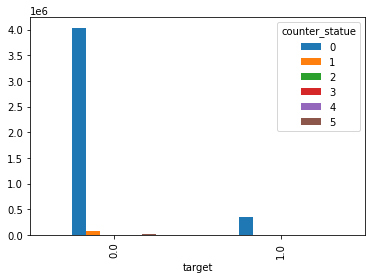

In [ ]:
sd_df = X.groupby('counter_statue').target.value_counts()
sd_df.unstack(level=0).plot(kind='bar')

In [ ]:
X['delta_index'].value_counts()

 0        472683
 1         24512
 2         15397
 3         12229
 4         10683
           ...  
 9617          1
-96936         1
-99454         1
 12583         1
 14744         1
Name: delta_index, Length: 21082, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 27 columns):
 #   Column                Dtype         
---  ------                -----         
 0   disrict               category      
 1   client_id             object        
 2   client_catg           category      
 3   region                category      
 4   creation_date         datetime64[ns]
 5   target                float64       
 6   region_group          int64         
 7   coop_time             int64         
 8   invoice_date          datetime64[ns]
 9   tarif_type            int64         
 10  counter_number        int64         
 11  counter_statue        int64         
 12  counter_code          int64         
 13  reading_remarque      int64         
 14  counter_coefficient   int64         
 15  consommation_level_1  int64         
 16  consommation_level_2  int64         
 17  consommation_level_3  int64         
 18  consommation_level_4  int64         
 19  

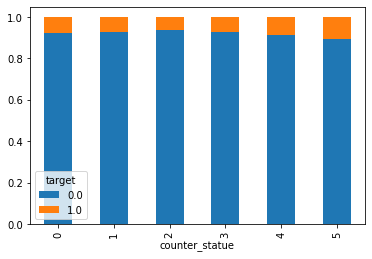

In [ ]:
tableau = pd.crosstab(X['counter_statue'],X['target'])
tableau
tableau.div(tableau.sum(1).astype(float),axis=0).plot(kind='bar',stacked='False')

In [ ]:
X.drop(['client_id'], axis=1, inplace=True)
X.drop(['invoice_date'], axis=1, inplace=True)
X.drop(['creation_date'], axis=1, inplace=True)
X.drop(['delta_index'], axis=1, inplace=True)
X.loc[X["counter_statue"] == "A", "counter_statue"] = -1
X['counter_statue'] = X['counter_statue'].astype('int')

In [ ]:
le = LabelEncoder()
X["counter_type"] =  le.fit_transform(X["counter_type"])

In [ ]:
test_not_numeric_columns = []
num_types = ["int64", "float64"]
for i in X:
    if X[i].dtype not in num_types:
        test_not_numeric_columns.append(i)
print("not numeric columns are ")
test_not_numeric_columns

not numeric columns are 


['disrict', 'client_catg', 'region']

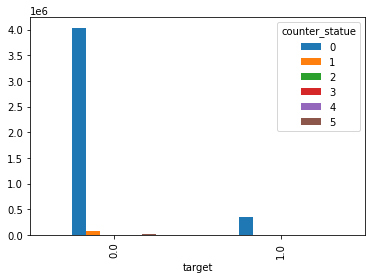

In [ ]:
sd_df = X.groupby('counter_statue').target.value_counts()
sd_df.unstack(level=0).plot(kind='bar')

In [ ]:
X.drop(['counter_statue'], axis=1, inplace=True)

In [ ]:
count_target = len(X.loc[X["target"] == 1, ["target"]])
b1 = X.loc[X["target"] == 1, ["target"]]
b2 = X.loc[X["target"] == 0, ["target"]][:count_target*3] 
balanced_y =pd.concat([b1,b2],axis=0) 
balanced_y.head()

,target
1384,1.0
1385,1.0
1386,1.0
1387,1.0
1388,1.0


In [ ]:
X.columns

Index(['disrict', 'client_catg', 'region', 'target', 'region_group',
       'coop_time', 'tarif_type', 'counter_number', 'counter_code',
       'reading_remarque', 'counter_coefficient', 'consommation_level_1',
       'consommation_level_2', 'consommation_level_3', 'consommation_level_4',
       'old_index', 'new_index', 'months_number', 'counter_type',
       'invoice_month', 'invoice_year', 'is_weekday'],
      dtype='object')

In [ ]:
col_x = ['disrict', 'client_catg', 'region', 'target', 'coop_time',
       'tarif_type', 'counter_number', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type',
       'invoice_month', 'invoice_year']
a1 = X.loc[X["target"] == 1, col_x]
a2 = X.loc[X["target"] == 0, col_x][:count_target*3]
balanced_x = pd.concat([a1, a2], axis=0)
balanced_x.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
for i in balanced_x : 
    le = StandardScaler()
    balanced_x[i] = le.fit_transform(balanced_x[[i]])
   

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(balanced_x,balanced_y,random_state=420,stratify=balanced_y)

#***Model 1 : Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model1 = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=42)
model1.fit(X_train,y_train)

<ipython-input-33-f29e7f86a1f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

***Evaluation***

In [ ]:
predictions1 = model1.predict(X_test)
print("Accuracy score : ", metrics.accuracy_score(y_test, predictions1))

Accuracy score :  1.0


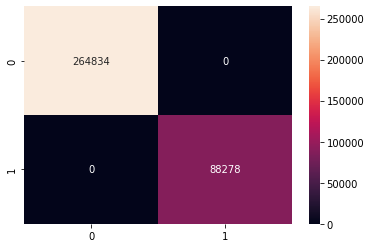

In [ ]:
matrix = metrics.confusion_matrix(y_test,predictions1)
ax= plt.subplot()
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)

# **Model2 : Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression(max_iter=2000)
model2.fit(X_train,y_train)
predictions2 = model2.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Evaluation***

In [ ]:
print (f'Accuracy  : {model2.score(X_train,y_train):.3f}')

Accuracy  : 1.000


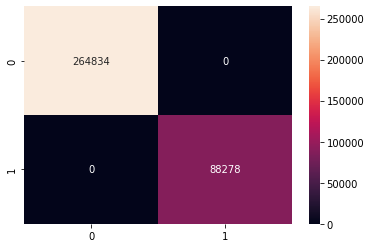

In [ ]:
matrix2 = metrics.confusion_matrix(y_test,predictions2)
ax= plt.subplot()
sns.heatmap(matrix2, annot=True, fmt='g', ax=ax)

# ***Model 3 : Neural Network***

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(20,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
tf.random.set_seed(420) 
history = model3.fit(X_train,y_train , epochs=12 , validation_data=(X_test,y_test))

Epoch 1/12
33105/33105 [==============================] - 116s 3ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 1.8968e-04 - val_accuracy: 1.0000
Epoch 2/12
33105/33105 [==============================] - 109s 3ms/step - loss: 3.8804e-04 - accuracy: 1.0000 - val_loss: 9.7256e-05 - val_accuracy: 1.0000
Epoch 3/12
33105/33105 [==============================] - 144s 4ms/step - loss: 1.5348e-04 - accuracy: 1.0000 - val_loss: 1.0228e-05 - val_accuracy: 1.0000
Epoch 4/12
33105/33105 [==============================] - 121s 4ms/step - loss: 1.0715e-04 - accuracy: 1.0000 - val_loss: 2.7908e-04 - val_accuracy: 1.0000
Epoch 5/12
33105/33105 [==============================] - 119s 4ms/step - loss: 1.1133e-04 - accuracy: 1.0000 - val_loss: 6.6282e-07 - val_accuracy: 1.0000
Epoch 6/12
33105/33105 [==============================] - 96s 3ms/step - loss: 1.0203e-10 - accuracy: 1.0000 - val_loss: 2.6959e-11 - val_accuracy: 1.0000
Epoch 7/12
33105/33105 [==============================] - 97s 3ms/ste

***Evaluation***

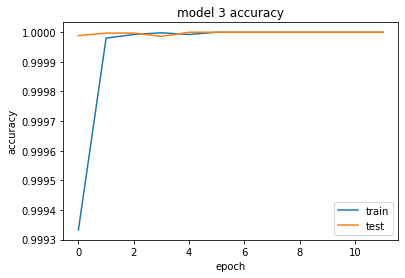

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

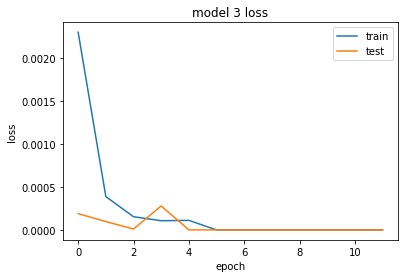

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()